In [1]:
options(warn=-1)

In [16]:
library(tidyr)
library(dplyr)
library(ggplot2)
library(patchwork)
library(alluvial)

In [3]:
main_theme = theme_linedraw() +
  theme(legend.position = "none",
        plot.title = element_text(size = 28),
        axis.title.x = element_text(size = 0, color = "black", hjust = 0.5),
        axis.title.y = element_text(size = 0,color = "black", hjust = 0.5),
        axis.ticks = element_line(color = "black"), 
        axis.text.y = element_text(color = "black", size = 28),
        axis.text.x = element_text(color = "black", size = 0)) 

In [7]:
spc <- read.csv('/path/to/data/spc.csv', sep = ",", header = T, row.names = 1)
names(spc) <- gsub("^X", "", names(spc))
head(spc)

,vial,397.307,401.164,405.022,408.879,412.736,416.594,420.451,424.308,428.166,⋯,dim_da,dim_ket,dim_mast,met_in,da_in,ket_in,mast_in,disease_in,disease_min,disease
,<chr>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>
1,JM006 1000,-0.07326907,1,1,1,-0.1279949,-0.1188428,-0.1338351,14.81902,-0.1274847,⋯,NA,NA,NA,NA,NA,NA,NA,Inf,Inf,0
2,JM006 1002,0.04021398,1,1,1,14.9473063,0.1117955,14.7098770,14.71823,14.7977676,⋯,NA,NA,NA,NA,NA,NA,NA,Inf,Inf,0
3,JM006 1003,15.05952360,1,1,1,0.8254424,0.1740542,14.9310503,14.90867,0.2375899,⋯,NA,NA,NA,NA,NA,NA,NA,Inf,Inf,0
4,JM006 1004,15.64211768,1,1,1,14.8384736,0.1018710,14.8572984,14.94703,0.2181086,⋯,NA,NA,NA,NA,NA,NA,NA,Inf,Inf,0
5,JM006 1005,14.67025372,1,1,1,14.8736669,14.5768853,14.6524259,14.83394,15.0828729,⋯,NA,NA,NA,NA,NA,NA,NA,Inf,Inf,0
6,JM006 1006,0.35748126,1,1,1,15.1296416,14.8059751,14.8534811,14.84384,14.9129939,⋯,NA,NA,16,NA,NA,NA,12,12,16,1


#### Figure 1B

`summarise()` has grouped output by 'dim', 'parity'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'dim', 'parity'. You can override using the `.groups` argument.


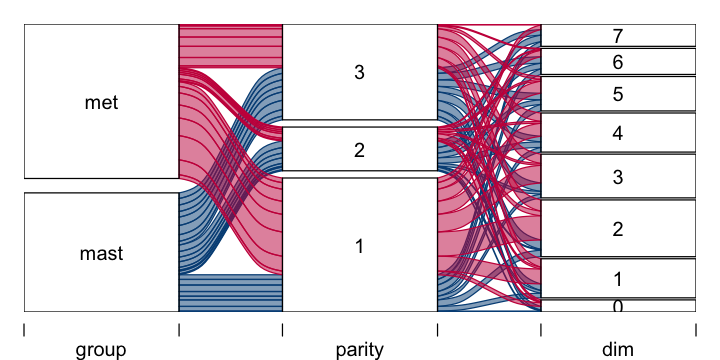

In [23]:
met <- spc[!is.na(spc$dim_met) & is.na(spc$dim_mast) & is.na(spc$dim_ket) & is.na(spc$dim_da) & spc$dim <= 7 & spc$disease_in <= 7, ]
met$parity <- sapply(met$parity, function(x) ifelse(x >= 3, 3, x))
met <- subset(met, select = c('dim', 'parity'))
colnames(met) <- c('dim', 'parity')
met$group <- 'met'
met <- met %>%
  group_by(dim, parity, group) %>% summarise(n = n())
                     
mast <- spc[is.na(spc$dim_met) & !is.na(spc$dim_mast) & is.na(spc$dim_ket) & is.na(spc$dim_da) & spc$dim <= 7 & spc$disease_in <= 7, ]
mast$parity <- sapply(mast$parity, function(x) ifelse(x >= 3, 3, x))
mast <- subset(mast, select = c('dim', 'parity'))
colnames(mast) <- c('dim', 'parity')
mast$group <- 'mast'
mast <- mast %>%
  group_by(dim, parity, group) %>% summarise(n = n())
                      
met_mast <- rbind(met, mast)
met_mast <- met_mast[, c('group', 'parity', 'dim', 'n')]

options(repr.plot.width=6, repr.plot.height=3)
alluvial(met_mast[,1:3], freq = met_mast$n,
         col = ifelse(met_mast$group == "met", "#c9184a", "#014f86"),
         border = ifelse(met_mast$group == "met", "#c9184a", "#014f86"),
         alpha = 0.5,
         cex = 1,
         cw = 0.3)

#### Figure 1C


	Wilcoxon rank sum test with continuity correction

data:  disease_in by group
W = 8, p-value = 0.07018
alternative hypothesis: true location shift is not equal to 0


	Wilcoxon rank sum test with continuity correction

data:  disease_in by group
W = 166.5, p-value = 0.3454
alternative hypothesis: true location shift is not equal to 0


	Wilcoxon rank sum test with continuity correction

data:  disease_in by group
W = 445, p-value = 0.3585
alternative hypothesis: true location shift is not equal to 0


	Wilcoxon rank sum test with continuity correction

data:  disease_in by group
W = 287, p-value = 0.3817
alternative hypothesis: true location shift is not equal to 0


	Wilcoxon rank sum test with continuity correction

data:  disease_in by group
W = 335, p-value = 0.00155
alternative hypothesis: true location shift is not equal to 0


	Wilcoxon rank sum test with continuity correction

data:  disease_in by group
W = 1344.5, p-value = 0.0002953
alternative hypothesis: true location shi

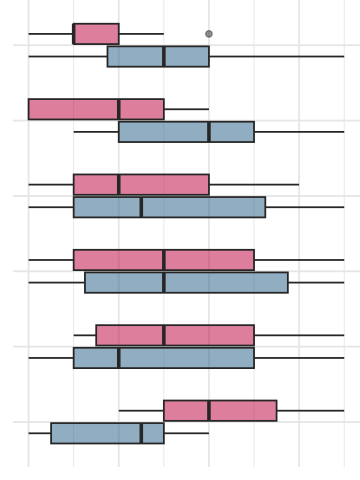

In [18]:
met <- spc[!is.na(spc$dim_met) & is.na(spc$dim_mast) & is.na(spc$dim_ket) & is.na(spc$dim_da) & spc$dim <= 7 & spc$disease_in <= 7, ]
met$dim <- sapply(met$dim, function(x) ifelse(x >= 5, '>=5', x))
met$dim <- factor(met$dim, levels=c(0, 1, 2, 3, 4, '>=5'))
met$group <- 'met'
                  
mast <- spc[is.na(spc$dim_met) & !is.na(spc$dim_mast) & is.na(spc$dim_ket) & is.na(spc$dim_da) & spc$dim <= 7 & spc$disease_in <= 7, ]
mast$dim <- sapply(mast$dim, function(x) ifelse(x >= 5, '>=5', x))
mast$dim <- factor(mast$dim, levels=c(0, 1, 2, 3, 4, '>=5'))
mast$group <- 'mast'
                   
met_mast <- rbind(met, mast)
                   
options(repr.plot.width=3, repr.plot.height=4)
ggplot(met_mast, aes(x = disease_in, y = dim, fill=group)) + 
    geom_boxplot(width=0.6, alpha=0.5) +
    scale_fill_manual(values=c("#2a6f97", "#c9184a")) + 
    theme_minimal() + 
    theme(
    plot.title = element_text(color="black", size=0, face="bold"),
    strip.text = element_text(size=30, face="bold"),
    axis.text.y = element_text(colour = "black", size = 0), 
    axis.text.x = element_text(colour = "black", size = 0, angle = 0, vjust = 0.5, hjust = 1), 
    legend.text = element_text(size = 10, face ="bold", colour ="black"), 
    legend.position = "none", 
    axis.title.y = element_text(face = "bold", size = 0), 
    axis.title.x = element_text(face = "bold", size = 0, colour = "black"), 
    legend.title = element_text(size = 14, colour = "black", face = "bold"), 
    panel.background = element_blank(), 
    panel.border = element_rect(colour = "black", fill = NA, size = 0),
    legend.key=element_blank(),
    plot.margin = unit(c(0,0,0,0), "cm"))

met_mast_sub <- met_mast %>% filter(dim == 0)
print(wilcox.test(disease_in ~ group, data=met_mast_sub))
met_mast_sub <- met_mast %>% filter(dim == 1)
print(wilcox.test(disease_in ~ group, data=met_mast_sub))
met_mast_sub <- met_mast %>% filter(dim == 2)
print(wilcox.test(disease_in ~ group, data=met_mast_sub))
met_mast_sub <- met_mast %>% filter(dim == 3)
print(wilcox.test(disease_in ~ group, data=met_mast_sub))
met_mast_sub <- met_mast %>% filter(dim == 4)
print(wilcox.test(disease_in ~ group, data=met_mast_sub))
met_mast_sub <- met_mast %>% filter(dim == '>=5') 
print(wilcox.test(disease_in ~ group, data=met_mast_sub))

#### Figure 1D & 1E

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   24.0   125.0   250.0   620.0   661.2  5361.0 
[1] 987.3074
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  34.00   74.25  216.50  782.86  915.50 5725.00 
[1] 1247.404

	Pairwise comparisons using Wilcoxon rank sum test with continuity correction 

data:  all$milkweightlbs and all$group 

     health  met    
met  < 2e-16 -      
mast 0.0025  4.8e-11

P value adjustment method: BH 

	Pairwise comparisons using Wilcoxon rank sum test with continuity correction 

data:  all$cells and all$group 

     health  met 
met  4.0e-16 -   
mast 3.7e-06 0.31

P value adjustment method: BH 


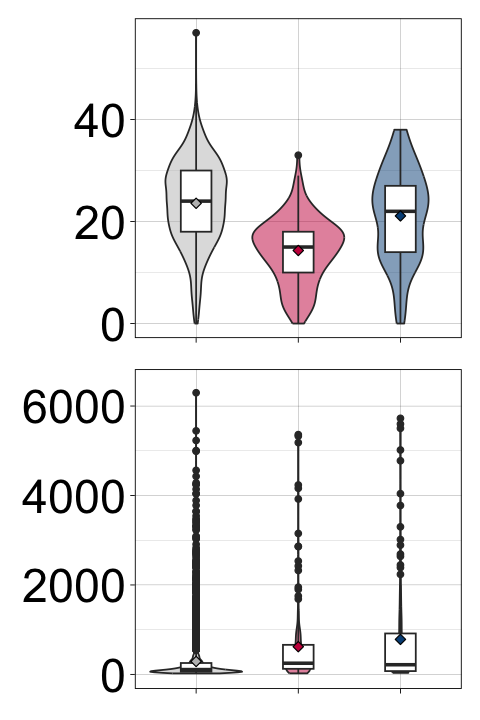

In [12]:
health <- spc %>% filter(disease == 0 & dim <= 7)
health$group <- 'health'
met <- spc[!is.na(spc$dim_met) & is.na(spc$dim_mast) & is.na(spc$dim_ket) & is.na(spc$dim_da) & spc$dim <= 7 & spc$disease_in <= 7, ]
met$group <- 'met'
mast <- spc[is.na(spc$dim_met) & !is.na(spc$dim_mast) & is.na(spc$dim_ket) & is.na(spc$dim_da) & spc$dim <= 7 & spc$disease_in <= 7, ]
mast$group <- 'mast'

all <- rbind(health, met, mast)
all$group <- factor(all$group, levels=c("health", "met", "mast"))

all_n <- all %>%
  group_by(group) %>% summarise(n = n())
all_n$group <- factor(all_n$group, levels=c("health", "met", "mast"))

p1 <- ggplot(all, aes(group, milkweightlbs, fill=group)) + 
   geom_violin(alpha=0.5) +
  geom_boxplot(width=0.3, fill="white") +
  stat_summary(fun.y=mean, geom="point", shape=23, size=2) + 
  scale_fill_manual(values=c("health" = "grey", "met" = "#c9184a", "mast" = "#014f86")) + # "health" = "#00798c", "met_da_ket" = "#edae49", "mast" = "#d1495b"
  theme_linedraw() + main_theme 

p2 <- ggplot(all, aes(group, cells, fill=group)) + 
   geom_violin(alpha=0.5) +
  geom_boxplot(width=0.3, fill="white") +
  stat_summary(fun.y=mean, geom="point", shape=23, size=2) + 
  scale_fill_manual(values=c("health" = "grey", "met" = "#c9184a", "mast" = "#014f86")) + # "health" = "#00798c", "met_da_ket" = "#edae49", "mast" = "#d1495b"
  theme_linedraw() + main_theme

all_sub <- all %>% filter(group == 'met')
print(summary(all_sub$cells))
print(sd(all_sub$cells))
all_sub <- all %>% filter(group == 'mast')
print(summary(all_sub$cells))
print(sd(all_sub$cells))

print(pairwise.wilcox.test(all$milkweightlbs, all$group, p.adjust.method='BH'))
print(pairwise.wilcox.test(all$cells, all$group, p.adjust.method='BH'))

options(repr.plot.width=4, repr.plot.height=6)
p1 + p2 + plot_layout(nrow = 2)


	Pairwise comparisons using Wilcoxon rank sum test with continuity correction 

data:  all_sub$milkweightlbs and all_sub$group 

     health met  
met  0.042  -    
mast 0.443  0.443

P value adjustment method: BH 

	Pairwise comparisons using Wilcoxon rank sum test with continuity correction 

data:  all_sub$milkweightlbs and all_sub$group 

     health met   
met  0.0042 -     
mast 0.6503 0.2104

P value adjustment method: BH 

	Pairwise comparisons using Wilcoxon rank sum test with continuity correction 

data:  all_sub$milkweightlbs and all_sub$group 

     health  met  
met  2.1e-08 -    
mast 0.028   0.237

P value adjustment method: BH 

	Pairwise comparisons using Wilcoxon rank sum test with continuity correction 

data:  all_sub$milkweightlbs and all_sub$group 

     health  met   
met  1.8e-08 -     
mast 0.7815  0.0012

P value adjustment method: BH 

	Pairwise comparisons using Wilcoxon rank sum test with continuity correction 

data:  all_sub$milkweightlbs and all_sub$gr

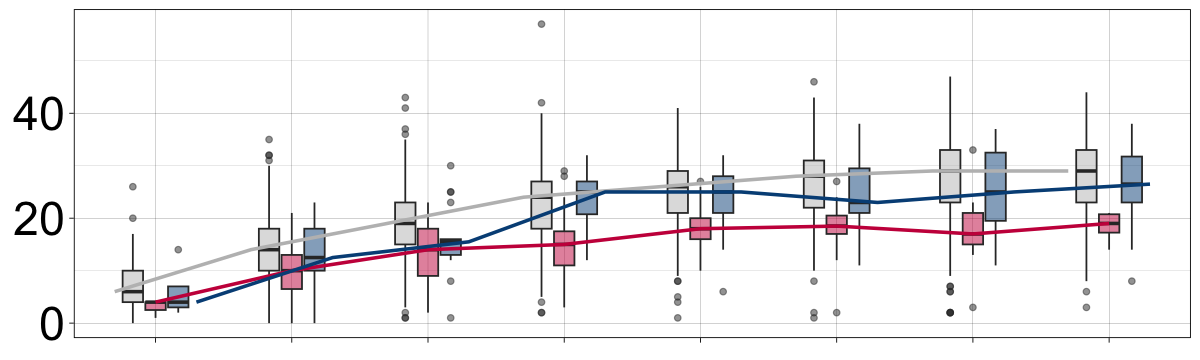

In [13]:
health <- spc %>% filter(disease == 0 & dim <= 7)
health$group <- 'health'
met <- spc[!is.na(spc$dim_met) & is.na(spc$dim_mast) & is.na(spc$dim_ket) & is.na(spc$dim_da) & spc$dim <= 7 & spc$disease_in <= 7, ]
met$group <- 'met'
mast <- spc[is.na(spc$dim_met) & !is.na(spc$dim_mast) & is.na(spc$dim_ket) & is.na(spc$dim_da) & spc$dim <= 7 & spc$disease_in <= 7, ]
mast$group <- 'mast'

all <- rbind(health, met, mast)
all$group <- factor(all$group, levels=c("health", "met", "mast"))

options(repr.plot.width=10, repr.plot.height=3)
all$dim <- as.factor(all$dim)
ggplot(all, aes(x=dim, y=milkweightlbs, fill=group)) + 
  geom_boxplot(width=0.5, alpha=0.5) +
  stat_summary(fun.y = median, geom = 'line', aes(group = group, color = group), position = position_dodge(width = 0.9), size = 1) +
  scale_fill_manual(values=c("health" = "grey", "met" = "#c9184a", "mast" = "#014f86")) + # "health" = "#00798c", "met_da_ket" = "#edae49", "mast" = "#d1495b"
  scale_color_manual(values=c("health" = "grey", "met" = "#c9184a", "mast" = "#014f86")) + # "health" = "#00798c", "met_da_ket" = "#edae49", "mast" = "#d1495b"
theme_bw() + main_theme

all_sub <- all %>% filter(dim == '0')
print(pairwise.wilcox.test(all_sub$milkweightlbs, all_sub$group, p.adjust.method='BH'))
all_sub <- all %>% filter(dim == '1')
print(pairwise.wilcox.test(all_sub$milkweightlbs, all_sub$group, p.adjust.method='BH'))
all_sub <- all %>% filter(dim == '2')
print(pairwise.wilcox.test(all_sub$milkweightlbs, all_sub$group, p.adjust.method='BH'))
all_sub <- all %>% filter(dim == '3')
print(pairwise.wilcox.test(all_sub$milkweightlbs, all_sub$group, p.adjust.method='BH'))
all_sub <- all %>% filter(dim == '4')
print(pairwise.wilcox.test(all_sub$milkweightlbs, all_sub$group, p.adjust.method='BH'))
all_sub <- all %>% filter(dim == '5')
print(pairwise.wilcox.test(all_sub$milkweightlbs, all_sub$group, p.adjust.method='BH'))
all_sub <- all %>% filter(dim == '6')
print(pairwise.wilcox.test(all_sub$milkweightlbs, all_sub$group, p.adjust.method='BH'))
all_sub <- all %>% filter(dim == '7')
print(pairwise.wilcox.test(all_sub$milkweightlbs, all_sub$group, p.adjust.method='BH'))


	Pairwise comparisons using Wilcoxon rank sum test with continuity correction 

data:  all_sub$cells and all_sub$group 

     health met 
met  0.84   -   
mast 0.84   0.84

P value adjustment method: BH 

	Pairwise comparisons using Wilcoxon rank sum test with continuity correction 

data:  all_sub$cells and all_sub$group 

     health met 
met  0.62   -   
mast 0.62   0.62

P value adjustment method: BH 

	Pairwise comparisons using Wilcoxon rank sum test with continuity correction 

data:  all_sub$cells and all_sub$group 

     health met  
met  0.018  -    
mast 0.044  0.591

P value adjustment method: BH 

	Pairwise comparisons using Wilcoxon rank sum test with continuity correction 

data:  all_sub$cells and all_sub$group 

     health met   
met  0.0085 -     
mast 0.0789 0.8751

P value adjustment method: BH 

	Pairwise comparisons using Wilcoxon rank sum test with continuity correction 

data:  all_sub$cells and all_sub$group 

     health met 
met  0.16   -   
mast 0.18   0.9

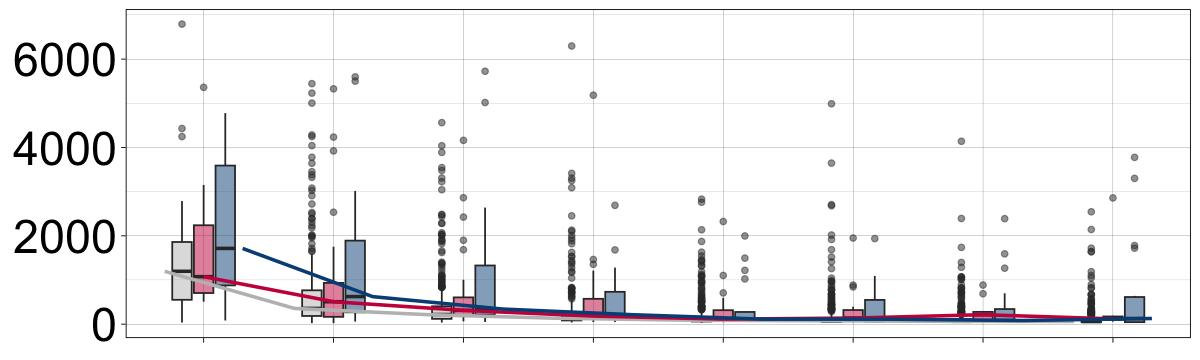

In [14]:
health <- spc %>% filter(disease == 0 & dim <= 7)
health$group <- 'health'
met <- spc[!is.na(spc$dim_met) & is.na(spc$dim_mast) & is.na(spc$dim_ket) & is.na(spc$dim_da) & spc$dim <= 7 & spc$disease_in <= 7, ]
met$group <- 'met'
mast <- spc[is.na(spc$dim_met) & !is.na(spc$dim_mast) & is.na(spc$dim_ket) & is.na(spc$dim_da) & spc$dim <= 7 & spc$disease_in <= 7, ]
mast$group <- 'mast'

all <- rbind(health, met, mast)
all$group <- factor(all$group, levels=c("health", "met", "mast"))

options(repr.plot.width=10, repr.plot.height=3)
all$dim <- as.factor(all$dim)
ggplot(all, aes(x=dim, y=cells, fill=group)) + 
  geom_boxplot(width=0.5, alpha=0.5) +
stat_summary(fun.y = median, geom = 'line', aes(group = group, color = group), position = position_dodge(width = 0.9), size = 1) +
  scale_fill_manual(values=c("health" = "grey", "met" = "#c9184a", "mast" = "#014f86")) + # "health" = "#00798c", "met_da_ket" = "#edae49", "mast" = "#d1495b"
  scale_color_manual(values=c("health" = "grey", "met" = "#c9184a", "mast" = "#014f86")) + # "health" = "#00798c", "met_da_ket" = "#edae49", "mast" = "#d1495b"
theme_bw() + main_theme

all_sub <- all %>% filter(dim == '0')
print(pairwise.wilcox.test(all_sub$cells, all_sub$group, p.adjust.method='BH'))
all_sub <- all %>% filter(dim == '1')
print(pairwise.wilcox.test(all_sub$cells, all_sub$group, p.adjust.method='BH'))
all_sub <- all %>% filter(dim == '2')
print(pairwise.wilcox.test(all_sub$cells, all_sub$group, p.adjust.method='BH'))
all_sub <- all %>% filter(dim == '3')
print(pairwise.wilcox.test(all_sub$cells, all_sub$group, p.adjust.method='BH'))
all_sub <- all %>% filter(dim == '4')
print(pairwise.wilcox.test(all_sub$cells, all_sub$group, p.adjust.method='BH'))
all_sub <- all %>% filter(dim == '5')
print(pairwise.wilcox.test(all_sub$cells, all_sub$group, p.adjust.method='BH'))
all_sub <- all %>% filter(dim == '6')
print(pairwise.wilcox.test(all_sub$cells, all_sub$group, p.adjust.method='BH'))
all_sub <- all %>% filter(dim == '7')
print(pairwise.wilcox.test(all_sub$cells, all_sub$group, p.adjust.method='BH'))